In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import matplotlib .pyplot as plt 
import seaborn as sns
from sklearn .preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/100%2C000%20UK%20Used%20Car%20Data%20set/audi.csv")

In [3]:
print(data.shape)
data.head()

(10668, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
columns = data.columns
columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [5]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [7]:
print(data.isnull().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [9]:
le = LabelEncoder()
le.fit(data['model'])
le.transform(data['model'])
data['model'] = le.transform(data['model'])
le = LabelEncoder()
le.fit(data['transmission'])
le.transform(data['transmission'])
data['transmission'] = le.transform(data['transmission'])

In [10]:
le = LabelEncoder()
le.fit(data['fuelType'])
le.transform(data['fuelType'])
data['fuelType'] = le.transform(data['fuelType'])

In [11]:
print(data.shape)
data.head()

(10668, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,2,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,2,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,2,145,49.6,1.0


In [14]:
train_data = data.iloc[:10000,:]
test_data = data.iloc[10000:,:]
print(train_data.shape)
print(test_data.shape)

(10000, 9)
(668, 9)


In [15]:
test_data = test_data.drop(columns="price")
test_data

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
10000,9,2016,0,36617,0,165,50.4,2.0
10001,11,2019,0,8824,0,150,33.2,3.0
10002,9,2015,0,23787,2,205,40.4,2.0
10003,2,2016,0,72800,1,0,176.6,1.4
10004,0,2015,1,83390,0,0,80.7,1.6
...,...,...,...,...,...,...,...,...
10663,2,2020,1,4018,2,145,49.6,1.0
10664,2,2020,1,1978,2,150,49.6,1.0
10665,2,2020,1,609,2,150,49.6,1.0
10666,9,2017,0,8646,2,150,47.9,1.4


In [17]:
y = train_data['price']
X = train_data.drop(columns = 'price')
print(X.shape)
print(y.shape)

(10000, 8)
(10000,)


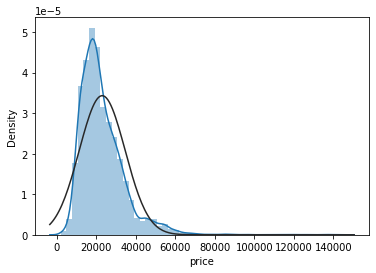

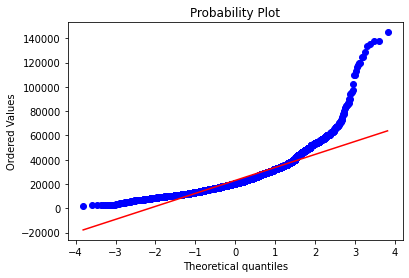

In [18]:
sns.distplot(y, fit=norm);
fig = plt.figure()
res = stats.probplot(y, plot=plt)

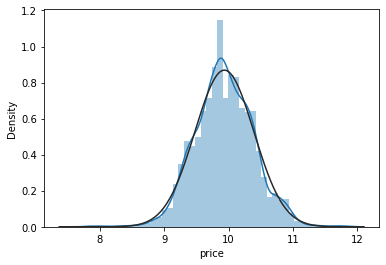

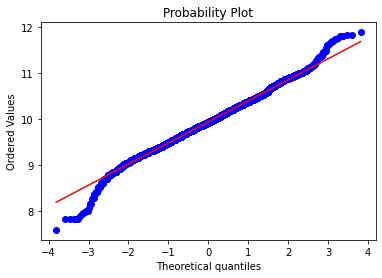

In [19]:
y  = np.log(y)
sns.distplot(y, fit=norm);
fig = plt.figure()
res = stats.probplot(y, plot=plt)

In [20]:
y = train_data["price"]
y

0       12500
1       16500
2       11000
3       16800
4       17300
        ...  
9995    17000
9996    14500
9997    17500
9998    18500
9999    18000
Name: price, Length: 10000, dtype: int64

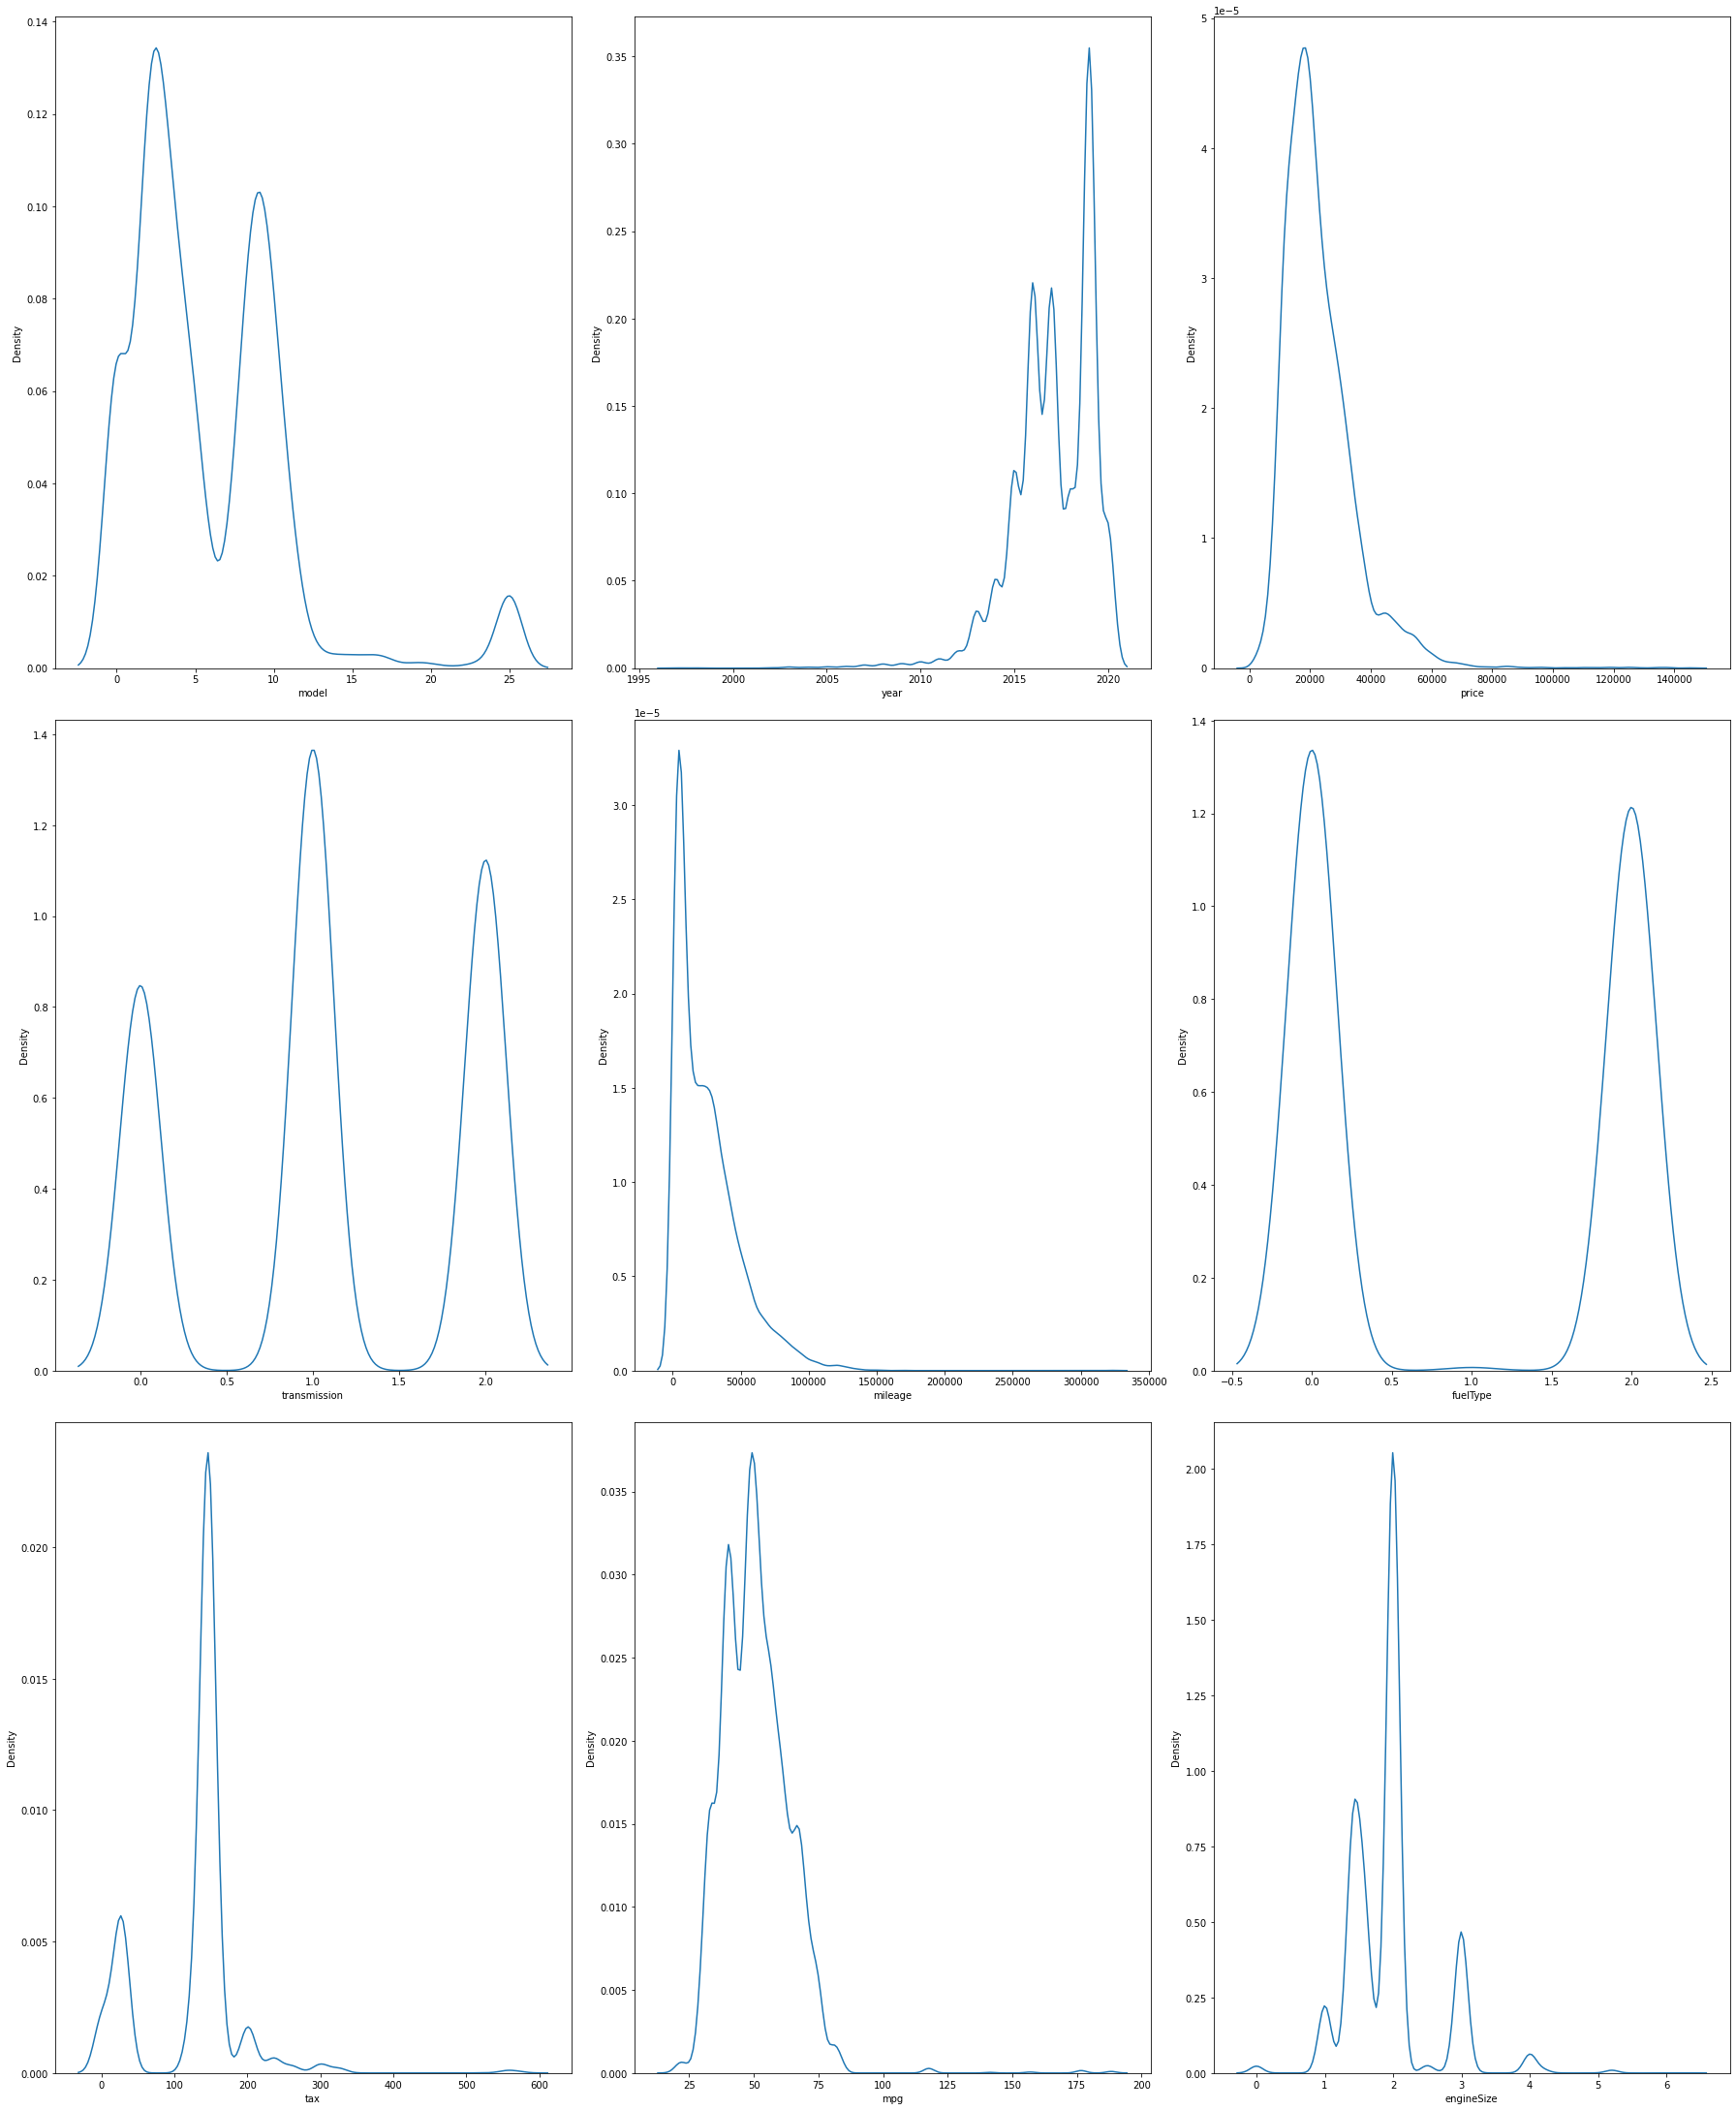

In [21]:
numerical_features = data.columns
fig = plt.figure(figsize=(25,40)) #figure size
o = 4  
q = 3  
w = 1  

for feat in numerical_features:
    plt.subplot(o, q, w)
    sns.kdeplot(x=data[feat])
    w+=1
    
plt.tight_layout()
plt.show()

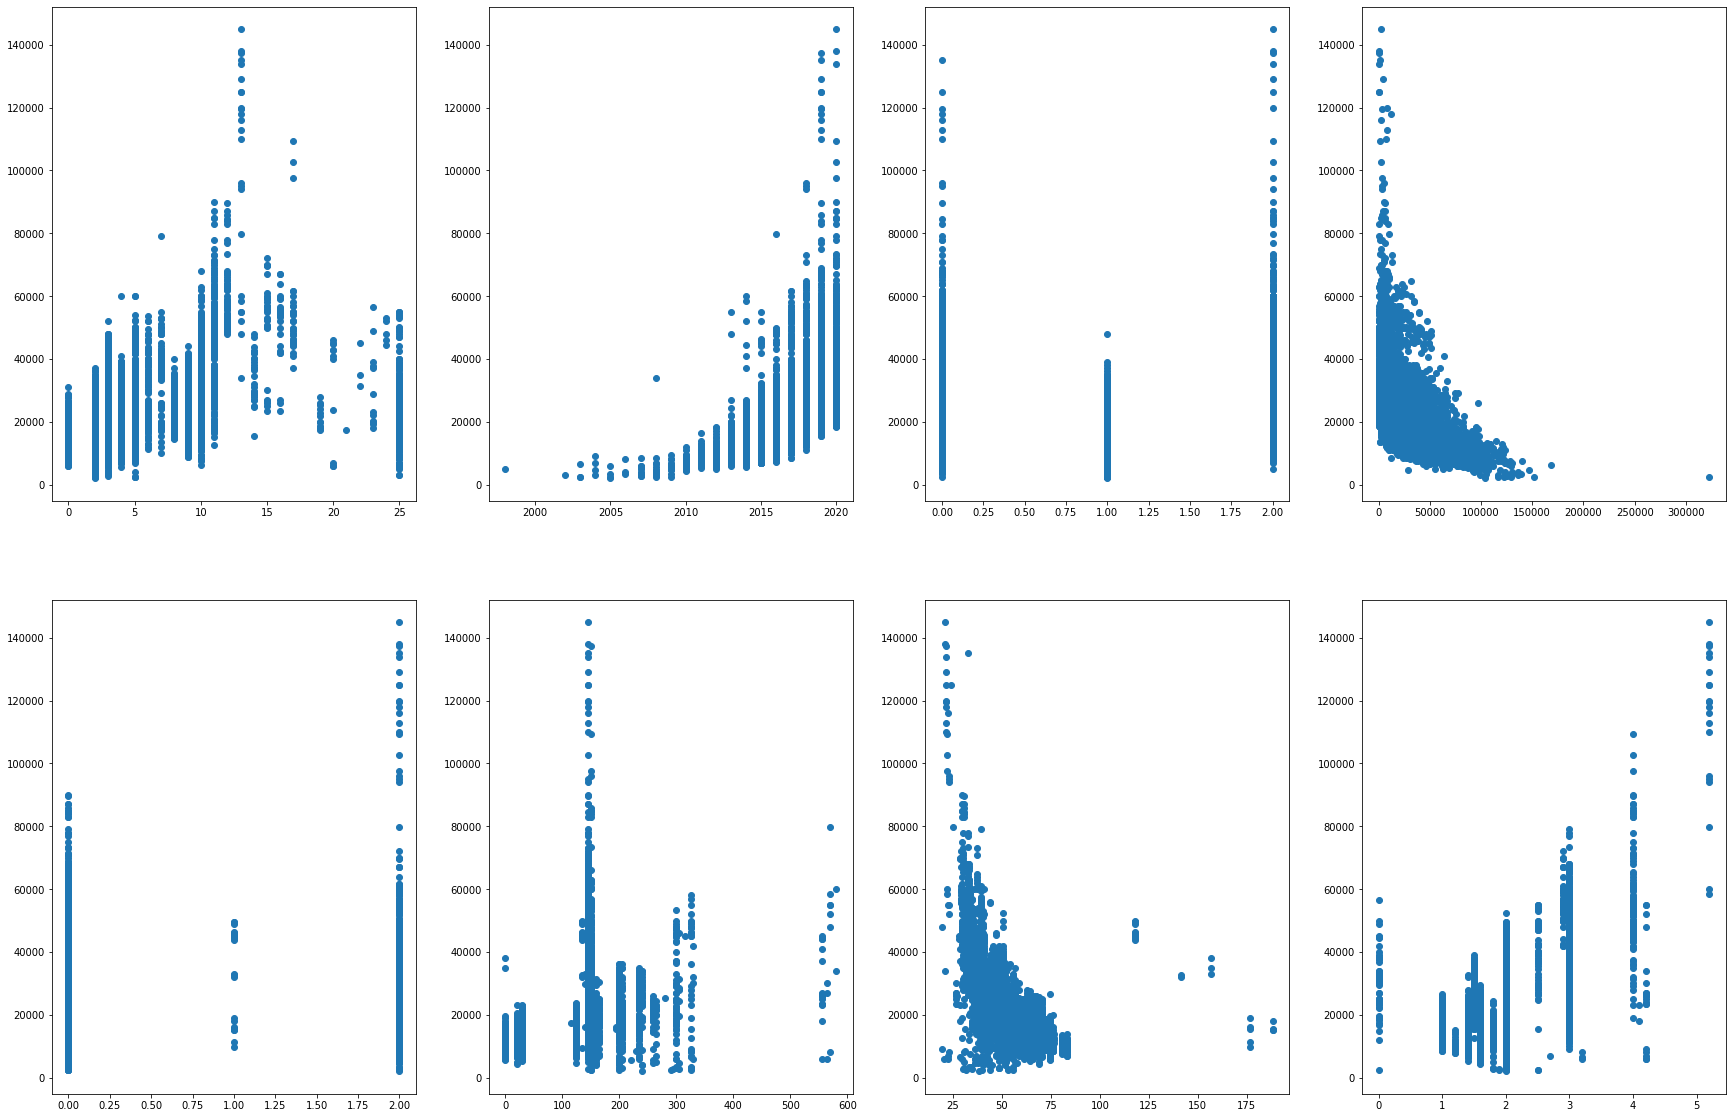

In [22]:
model = X['model']
year = X['year']
trans = X['transmission']
mile = X['mileage']
fuel = X['fuelType']
tax = X['tax']
mpg = X['mpg']
eng = X['engineSize']
fig, ax = plt.subplots(2,4,figsize=(30,20))
ax[0,0].scatter(model,y)
ax[0,1].scatter(year,y)
ax[0,2].scatter(trans,y)
ax[0,3].scatter(mile,y)
ax[1,0].scatter(fuel,y)
ax[1,1].scatter(tax,y)
ax[1,2].scatter(mpg,y)
ax[1,3].scatter(eng,y)

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X.shape)

(10000, 8)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6700, 8)
(6700,)
(3300, 8)
(3300,)


In [25]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=50,max_depth=15, random_state=33,min_samples_split=2,min_samples_leaf=2
                                                ,n_jobs=-1 )
                                                  
RandomForestRegressorModel.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, n_estimators=50,
                      n_jobs=-1, random_state=33)

In [26]:
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))

Random Forest Regressor Train Score is :  0.9816319285596541
Random Forest Regressor Test Score is :  0.9587951578072804


In [27]:
y_pred =  RandomForestRegressorModel.predict(X_test)

print('Predicted Value for RandomForestRegressorModelis : ' , y_pred)
print( ' y : ' , y[:10])

print(y_pred.shape)

Predicted Value for RandomForestRegressorModelis :  [13058.8592381  25617.48760944 24693.287      ... 23660.52720635
 16259.17348413 25608.63266667]
 y :  0    12500
1    16500
2    11000
3    16800
4    17300
5    13900
6    13250
7    11750
8    10200
9    12000
Name: price, dtype: int64
(3300,)


In [28]:
y_pred= pd.DataFrame(y_pred,columns=['Expected'])
y_pred

,Expected
0,13058.859238
1,25617.487609
2,24693.287000
3,44980.488618
4,17172.772514
...,...
3295,21657.928432
3296,8473.728500
3297,23660.527206
3298,16259.173484


In [29]:
y= pd.DataFrame(y)
y

,price
0,12500
1,16500
2,11000
3,16800
4,17300
...,...
9995,17000
9996,14500
9997,17500
9998,18500


In [30]:
y['Expected'] = y_pred
y.head(10)

,price,Expected
0,12500,13058.859238
1,16500,25617.487609
2,11000,24693.287000
3,16800,44980.488618
4,17300,17172.772514
5,13900,26502.892238
6,13250,27955.040083
7,11750,16328.438435
8,10200,11265.405513
9,12000,45104.151286


In [31]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print("MAEValue is :" ,MAEValue)

MAEValue is : 1580.907478311807


In [32]:
MSEValue= mean_squared_error(y_test, y_pred, multioutput='raw_values')
print("MSEValue is : " , MSEValue)

MSEValue is :  [5783996.67706646]


In [33]:
ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='mean')
Imputedy = ImputedModule.fit(y)
y = Imputedy.transform(y)
y

array([[12500.        , 13058.8592381 ],
       [16500.        , 25617.48760944],
       [11000.        , 24693.287     ],
       ...,
       [17500.        , 23133.95048613],
       [18500.        , 23133.95048613],
       [18000.        , 23133.95048613]])

In [34]:
sel = SelectFromModel(RandomForestRegressor( )) 
sel.fit(X,y)
selected_features = sel.transform(X)
sel.get_support()

array([False,  True, False,  True, False, False,  True,  True])

In [35]:
feature_importance =  RandomForestRegressorModel.feature_importances_
feature_importance

array([0.05824795, 0.19998565, 0.00521153, 0.03634517, 0.00347867,
       0.0385967 , 0.43872624, 0.21940809])

In [36]:
feature_importance= pd.DataFrame(feature_importance,columns=['feature'])
feature_importance

,feature
0,0.058248
1,0.199986
2,0.005212
3,0.036345
4,0.003479
5,0.038597
6,0.438726
7,0.219408
